# Mean-Field Quantum Landau-Lifshitz-Bloch simulations

Mean-Field Quantum Landau-Lifshitz-Bloch simulations

## Setup

Do all necessary imports and settings.

In [1]:
%load_ext autoreload
%autoreload 2

import udkm1Dsim as ud
u = ud.u  # import the pint unit registry from udkm1Dsim
import scipy.constants as constants
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
u.setup_matplotlib()  # use matplotlib with pint units

## Structure

 to the [structure-example](structure.ipynb) for more details.

In [2]:
Co = ud.Atom('Co')
Ni = ud.Atom('Ni')
Fe = ud.Atom('Fe')
Si = ud.Atom('Si')

In [3]:
prop_Ni = {}
prop_Ni['heat_capacity'] = ['0.1*T',
                              532*u.J/u.kg/u.K,
                             ]
prop_Ni['therm_cond'] = [20*u.W/(u.m*u.K),
                           80*u.W/(u.m*u.K),]

prop_Ni['aniso_exponents'] = [1, 2, 3]

R = 25.3/1e-12
Tc = 1388
g = 4.0e18

prop_Ni['sub_system_coupling'] = \
    ['-{:f}*(T_0-T_1)'.format(g),
     '{:f}*(T_0-T_1)'.format(g)
    ]
prop_Ni['lin_therm_exp'] = [0, 11.8e-6]
prop_Ni['sound_vel'] = 4.910*u.nm/u.ps
prop_Ni['opt_ref_index'] = 2.9174+3.3545j

# LLB stuff
prop_Ni['eff_spin'] = 0.5
prop_Ni['curie_temp'] = 630*u.K
prop_Ni['lamda'] = 0.005
prop_Ni['mag_moment'] = 0.393*u.bohr_magneton
prop_Ni['aniso_exponents'] = [0, 0, 3]
prop_Ni['anisotropy'] = 0.45e6*u.J/u.m**3
prop_Ni['exch_stiffness'] = 1e-11*u.J/u.m
prop_Ni['mag_saturation'] = 500e3*u.J/u.T/u.m**3

layer_Ni = ud.AmorphousLayer('Ni', 'Ni amorphous', thickness=1*u.nm,
                             density=7000*u.kg/u.m**3, atom=Ni, **prop_Ni)

Number of subsystems changed from 1 to 2.


In [4]:
prop_Co = {}
prop_Co['heat_capacity'] = ['0.1*T',
                              332*u.J/u.kg/u.K,
                             ]
prop_Co['therm_cond'] = [20*u.W/(u.m*u.K),
                           80*u.W/(u.m*u.K),]

prop_Co['aniso_exponents'] = [1, 2, 3]

R = 25.3/1e-12
Tc = 1388
g = 5.0e18

prop_Co['sub_system_coupling'] = \
    ['-{:f}*(T_0-T_1)'.format(g),
     '{:f}*(T_0-T_1)'.format(g)
    ]
prop_Co['lin_therm_exp'] = [0, 11.8e-6]
prop_Co['sound_vel'] = 4.910*u.nm/u.ps
prop_Co['opt_ref_index'] = 2.9174+3.3545j

# LLB stuff
prop_Co['eff_spin'] = 1e6
prop_Co['curie_temp'] = 1480*u.K
prop_Co['lamda'] = 0.005
prop_Co['mag_moment'] = 0.393*u.bohr_magneton
prop_Co['aniso_exponents'] = [0, 0, 3]
prop_Co['anisotropy'] = 0.45e6*u.J/u.m**3
prop_Co['exch_stiffness'] = 1e-11*u.J/u.m
prop_Co['mag_saturation'] = 1400e3*u.J/u.T/u.m**3

layer_Co = ud.AmorphousLayer('Co', 'Co amorphous', thickness=1*u.nm,
                             density=7000*u.kg/u.m**3, atom=Co, **prop_Co)

Number of subsystems changed from 1 to 2.


In [5]:
print(layer_Co)

Amorphous layer with the following properties

=============================  ==========================================
                    parameter  value
=============================  ==========================================
                           id  Co
                         name  Co amorphous
                    thickness  1.0 nm
                         area  0.01 nm²
                       volume  0.01 nm³
                         mass  7×10⁻²⁶ kg
           mass per unit area  7×10⁻²⁶ kg
                      density  7×10³ kg/m³
                    roughness  0.0 nm
          Debye Waller Factor  0 m²
               sound velocity  4.91×10³ m/s
              spring constant  [1.6875670000000007] kg/s²
               phonon damping  0.0 kg/s
              opt. pen. depth  0.0 nm
        opt. refractive index  (2.9174+3.3545j)
       opt. ref. index/strain  0
             thermal conduct.  20.0 W/(m K)
                               80.0 W/(m K)
     linear thermal ex

In [6]:
prop_Fe = {}
prop_Fe['heat_capacity'] = ['0.1*T',
                              732*u.J/u.kg/u.K,
                             ]
prop_Fe['therm_cond'] = [20*u.W/(u.m*u.K),
                           80*u.W/(u.m*u.K),]

prop_Fe['aniso_exponents'] = [1, 2, 3]

R = 25.3/1e-12
Tc = 1388
g = 6.0e18

prop_Fe['sub_system_coupling'] = \
    ['-{:f}*(T_0-T_1)'.format(g),
     '{:f}*(T_0-T_1)'.format(g)
    ]
prop_Fe['lin_therm_exp'] = [0, 11.8e-6]
prop_Fe['sound_vel'] = 4.910*u.nm/u.ps
prop_Fe['opt_ref_index'] = 2.9174+3.3545j

# LLB stuff
prop_Fe['eff_spin'] = 2
prop_Fe['curie_temp'] = 1024*u.K
prop_Fe['lamda'] = 0.005
prop_Fe['mag_moment'] = 2.2*u.bohr_magneton
prop_Fe['aniso_exponents'] = [0, 0, 3]
prop_Fe['anisotropy'] = 0.45e6*u.J/u.m**3
prop_Fe['exch_stiffness'] = 1e-11*u.J/u.m
prop_Fe['mag_saturation'] = 200e3*u.J/u.T/u.m**3

layer_Fe = ud.AmorphousLayer('Fe', 'Fe amorphous', thickness=1*u.nm,
                             density=7000*u.kg/u.m**3, atom=Fe, **prop_Fe)

Number of subsystems changed from 1 to 2.


In [7]:
prop_Si = {}
prop_Si['heat_capacity'] = [100*u.J/u.kg/u.K, 603*u.J/u.kg/u.K]
prop_Si['therm_cond'] = [0, 100*u.W/(u.m*u.K)]

prop_Si['sub_system_coupling'] = [0, 0]

prop_Si['lin_therm_exp'] = [0, 2.6e-6]
prop_Si['sound_vel'] = 8.433*u.nm/u.ps
prop_Si['opt_ref_index'] = 3.6941+0.0065435j

layer_Si = ud.AmorphousLayer('Si', "Si amorphous", thickness=1*u.nm, density=2336*u.kg/u.m**3,
                             atom=Si, **prop_Si)

Number of subsystems changed from 1 to 2.


In [8]:
S = ud.Structure('CoNi')

S.add_sub_structure(layer_Ni, 10)
S.add_sub_structure(layer_Co, 15)
S.add_sub_structure(layer_Fe, 10)
S.add_sub_structure(layer_Ni, 25)

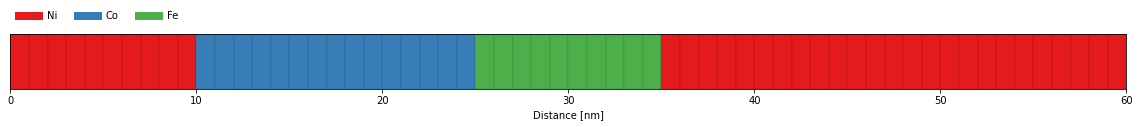

In [9]:
S.visualize()

## Initialize Heat and the Excitation

In [10]:
h = ud.Heat(S, True)

h.save_data = False
h.disp_messages = True

In [11]:
h.excitation = {'fluence': [10]*u.mJ/u.cm**2,
                'delay_pump':  [0]*u.ps,
                'pulse_width':  [0.05]*u.ps,
                'multilayer_absorption': True,
                'wavelength': 800*u.nm,
                'theta': 45*u.deg}
# temporal and spatial grid
delays = np.r_[-1:5:0.005]*u.ps
_, _, distances = S.get_distances_of_layers()

## Calculate Heat Diffusion

In [12]:
# enable heat diffusion
h.heat_diffusion = True
# set the boundary conditions
h.boundary_conditions = {'top_type': 'isolator', 'bottom_type': 'isolator'}
# The resulting temperature profile is calculated in one line:

temp_map, delta_temp = h.get_temp_map(delays, 300)

Surface incidence fluence scaled by factor 0.7071 due to incidence angle theta=45.00 deg
Calculating _heat_diffusion_ for excitation 1:1 ...
Absorption profile is calculated by multilayer formalism.
Total reflectivity of 44.4 % and transmission of 8.6 %.


0it [00:00, ?it/s]

Elapsed time for _heat_diffusion_ with 1 excitation(s): 2.827790 s
Calculating _heat_diffusion_ without excitation...


0it [00:00, ?it/s]

Elapsed time for _heat_diffusion_: 3.087329 s
Elapsed time for _temp_map_: 5.969759 s


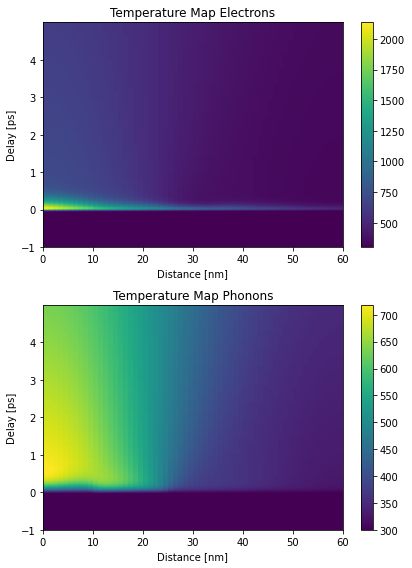

In [13]:
plt.figure(figsize=[6, 8])
plt.subplot(2, 1, 1)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, temp_map[:, :, 0],
               shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('Temperature Map Electrons')

plt.subplot(2, 1, 2)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, temp_map[:, :, 1],
               shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('Temperature Map Phonons')

plt.tight_layout()
plt.show()

## Magnetization

In [14]:
mag = ud.LLB(S, True)
mag.save_data = False
print(mag)

Landau-Lifshitz-Bloch Magnetization Dynamics simulation properties:

Magnetization simulation properties:

This is the current structure for the simulations:

Structure properties:

Name   : CoNi
Thickness : 60.00 nanometer
Roughness : 0.00 nanometer
----
10 times Ni amorphous: 10.00 nanometer
15 times Co amorphous: 15.00 nanometer
10 times Fe amorphous: 10.00 nanometer
25 times Ni amorphous: 25.00 nanometer
----
no substrate


Display properties:

================  =======
       parameter  value
================  =======
    force recalc  True
 cache directory  ./
display messages  True
       save data  False
    progress bar  True
================  =======


In [20]:
magnetization_map = mag.get_magnetization_map(delays, temp_map=temp_map,
                                              H_ext=np.array([0, 0, 1]))

Calculating _magnetization_map_ ...
Calculating _mean_field_magnetization_map_ ...
Elapsed time for _mean_field_magnetization_map_: 10.771507 s


0it [00:00, ?it/s]

c:\users\loc_schick\general\git\udkm1dsim\udkm1Dsim\simulations\magnetization.py:511: RuntimeWarning: divide by zero encountered in divide
  np.divide(alpha_trans, m_squared)[:, np.newaxis],
c:\users\loc_schick\general\git\udkm1dsim\udkm1Dsim\simulations\magnetization.py:510: RuntimeWarning: invalid value encountered in multiply
  trans_damping = np.multiply(
c:\users\loc_schick\general\git\udkm1dsim\udkm1Dsim\simulations\magnetization.py:796: RuntimeWarning: overflow encountered in sinh
  np.sinh(2*qs)
c:\users\loc_schick\general\git\udkm1dsim\udkm1Dsim\simulations\magnetization.py:519: RuntimeWarning: divide by zero encountered in divide
  np.divide(alpha_long, m_squared)[:, np.newaxis],
c:\users\loc_schick\general\git\udkm1dsim\udkm1Dsim\simulations\magnetization.py:519: RuntimeWarning: invalid value encountered in divide
  np.divide(alpha_long, m_squared)[:, np.newaxis],
c:\users\loc_schick\general\git\udkm1dsim\udkm1Dsim\simulations\magnetization.py:518: RuntimeWarning: invalid va

AttributeError: 'list' object has no attribute 'T'

## generate mf-field magnetization map

This function computes the mean field mean magnetization map by solving the self-consistent equation m=B(m, T)
As an output we get an interpolation function of the mean field magnetization at any temperature T<=T_c (this can of course be extended to T>T_c with zeros).

### Brillouin function

In [159]:
import scipy.constants as constants

def Brillouin(m, T, eff_spins, mf_exch_couplings, curie_temps):
    eta = mf_exch_couplings * m / constants.k / T / curie_temps
    c1 = (2 * eff_spins + 1) / (2 * eff_spins)
    c2 = 1 / (2 * eff_spins)
    return c1 / np.tanh(c1 * eta) - c2 / np.tanh(c2 * eta)

In [160]:
eff_spins = S.get_layer_property_vector('eff_spin')
mf_exch_couplings = S.get_layer_property_vector('mf_exch_coupling')
curie_temps = S.get_layer_property_vector('_curie_temp')

Brillouin(0.5, temp_map[1000, :, 0], eff_spins, mf_exch_couplings, curie_temps)

array([0.00077377, 0.00077467, 0.00077643, 0.00077906, 0.00078256,
       0.00078694, 0.00079218, 0.00079829, 0.00080526, 0.00081308,
       0.00082169, 0.00083111, 0.0008413 , 0.00085221, 0.00086384,
       0.00087617, 0.00088921, 0.00090296, 0.0009174 , 0.00093252,
       0.00094833, 0.0009648 , 0.00098192, 0.00099965, 0.00101797,
       0.00103679, 0.00105604, 0.00107558, 0.00109531, 0.0011151 ,
       0.00113482, 0.00115436, 0.00117359, 0.00119238, 0.00121064,
       0.00122829, 0.00124546, 0.00126215, 0.00127831, 0.00129388,
       0.00130882, 0.0013231 , 0.00133669, 0.00134956, 0.0013617 ,
       0.00137308, 0.0013837 , 0.00139355, 0.00140263, 0.00141094,
       0.00141847, 0.00142522, 0.0014312 , 0.00143642, 0.00144087,
       0.00144456, 0.00144749, 0.00144966, 0.00145107, 0.00145173])

In [171]:
from scipy.optimize import fsolve

#def find_intersection_sp(m, Bm, m0):
#    return fsolve(lambda x: m(x) - Bm(x), m0)

N = 1 #S.get_number_of_layers()
M = len(delays)

mf_mag_map = np.zeros([M, N])

t1 = time.time()
for i in range(N):
    for j in range(M):
        T = j/curie_temps[i] # temp_map[j, i, 0]/curie_temps[i]
        if T > 1:
            mf_mag_map[j, i] = 0
        else:
            mf_mag_map[j, i] = fsolve(lambda x: x - Brillouin(x, T, eff_spins[i],
                                                              mf_exch_couplings[i],
                                                              curie_temps[i]), np.sqrt(1-T))

t2 = time.time()
print('{:f} s'.format(t2-t1))

0.090587 s


C:\Users\LOC_SC~1\AppData\Local\Temp/ipykernel_42820/4042847752.py:4: RuntimeWarning: divide by zero encountered in divide
  eta = mf_exch_couplings * m / constants.k / T / curie_temps
C:\Users\LOC_SC~1\AppData\Local\Temp/ipykernel_42820/4042847752.py:7: RuntimeWarning: divide by zero encountered in divide
  return c1 / np.tanh(c1 * eta) - c2 / np.tanh(c2 * eta)
C:\Users\LOC_SC~1\AppData\Local\Temp/ipykernel_42820/4042847752.py:7: RuntimeWarning: invalid value encountered in subtract
  return c1 / np.tanh(c1 * eta) - c2 / np.tanh(c2 * eta)


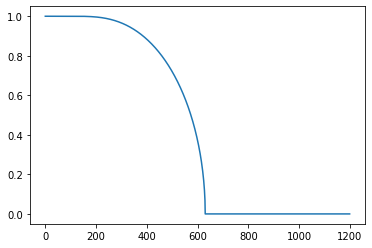

In [173]:
plt.figure()
plt.plot(mf_mag_map)
plt.show()

TypeError: Dimensions of C (1200, 1) should be one smaller than X(60) and Y(1200) while using shading='flat' see help(pcolormesh)

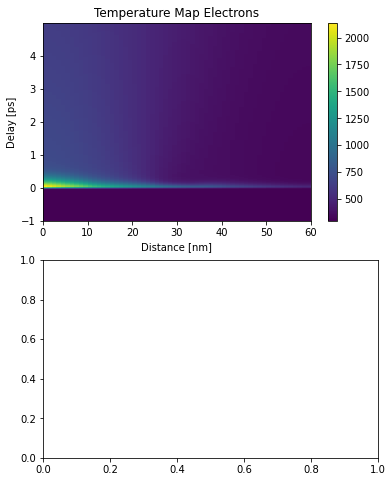

In [166]:
plt.figure(figsize=[6, 8])

plt.subplot(2, 1, 1)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, temp_map[:, :, 0],
               shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('Temperature Map Electrons')

plt.subplot(2, 1, 2)

plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, mf_mag_map, shading='auto')
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('mean-field magnetization')

plt.tight_layout()

plt.show()

In [167]:
M

1200

In [175]:
temp_map.shape

(1200, 60, 2)